In [1]:
from sklearn.datasets import make_blobs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression

In [2]:
#Readying the dataset 
df = pd.read_csv('training.csv')
pool = pd.read_csv('pool.csv')
test = pd.read_csv('testing.csv')

df.rename(columns = {'sepal_length':'x','petal_width':'y','species':'class'},inplace = True)
pool.rename(columns = {'sepal_length':'x','petal_width':'y','species':'class'},inplace = True)

df['class'] = df['class'].replace('virginica',0) 
df['class'] = df['class'].replace('versicolor',1) 
df['class'] = df['class'].replace('setosa',2) 

pool['class'] = pool['class'].replace('virginica',0) 
pool['class'] = pool['class'].replace('versicolor',1) 
pool['class'] = pool['class'].replace('setosa',2) 

c:\users\abhinav\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\abhinav\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
c:\users\abhinav\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\abhinav\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.

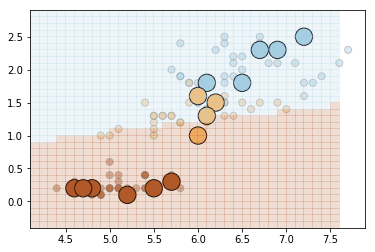

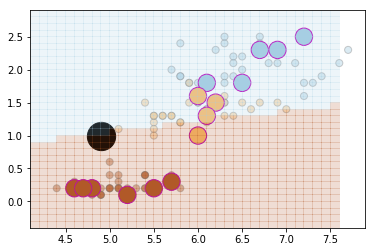

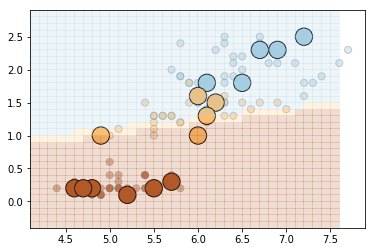

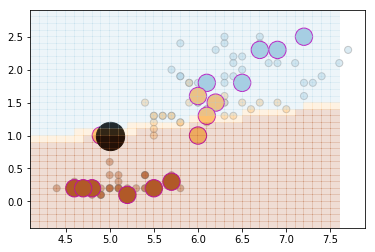

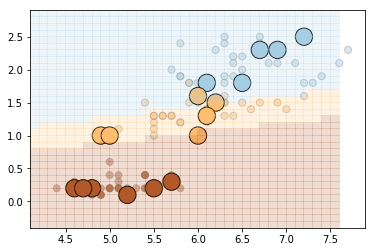

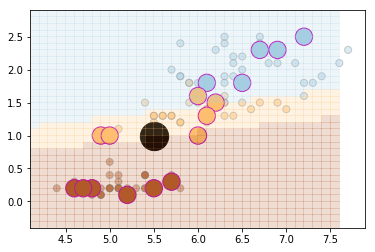

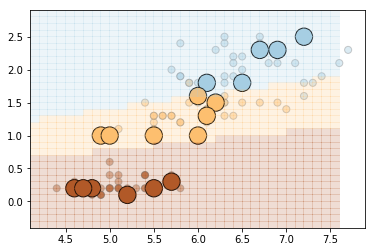

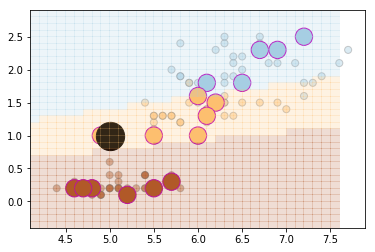

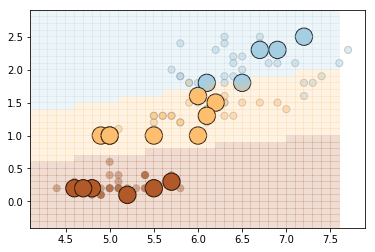

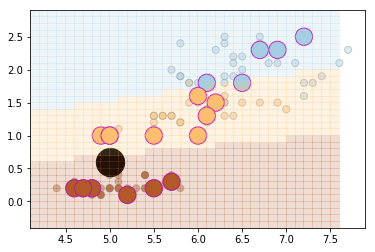

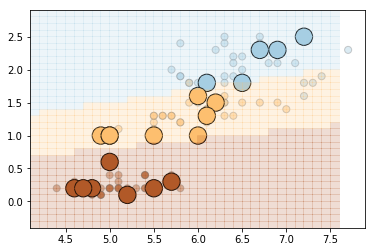

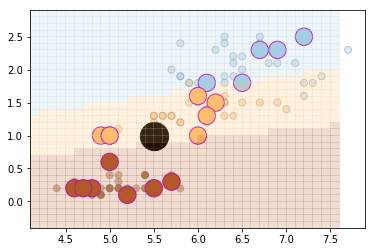

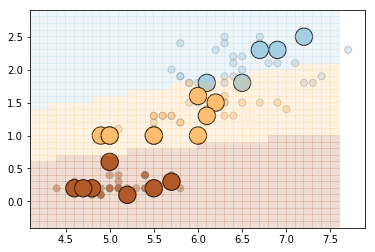

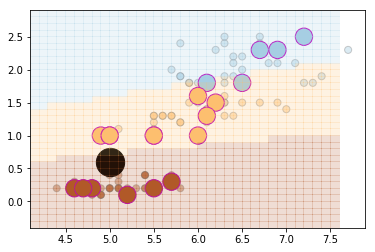

In [3]:

for i in range(1,15,2):

    l = LogisticRegression()
    l.fit(df[['x','y']], df['class'])
    x_min, x_max = df['x'].values.min() - .5, df['x'].max() + .5
    y_min, y_max = df['y'].min() - .5, df['y'].max() + .5
    h = 0.1  # step size in the mesh
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = l.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)

    source = pd.DataFrame({'x': xx.ravel(),
                     'y': yy.ravel(),
                     'z': Z.ravel()})
    fig1 = plt.figure()
    ax1 = plt.subplot(111)
    
    ax1.scatter(pool['x'], pool['y'], c= pool['class'], alpha=0.4, cmap=plt.cm.Paired, edgecolors='grey', s=50 )
    ax1.scatter(df['x'], df['y'], c=df['class'], 
            edgecolors='k', s=300, cmap=plt.cm.Paired )
    
    ax1.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)
    
    least_confident_ix = pd.DataFrame(l.predict_proba(pool[['x','y']])).max(axis=1).idxmin()
    
    fig1.savefig('images/'+str(i)+'.png')
    
    fig1 = plt.figure()
    ax1 = plt.subplot(111)
    
    
    ax1.scatter(pool['x'], pool['y'], c= pool['class'], alpha=0.4, cmap=plt.cm.Paired, edgecolors='grey', s=50)
    ax1.scatter(df['x'], df['y'], c= df['class'], 
            edgecolors='m', s=300, cmap=plt.cm.Paired )
    ax1.scatter(pool.iloc[least_confident_ix]['x'], pool.iloc[least_confident_ix]['y'], c= 'k', 
            edgecolors='k', s=800, cmap=plt.cm.Paired )
    ax1.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)
    
    df = df.append(pool.iloc[least_confident_ix])
    
    pool = pool.drop([least_confident_ix])
    
    fig1.savefig('images/'+str(i+1)+'.png')
    
    
    


In [4]:
import cv2
from PIL import Image
frames = []
for i in range(1,15): 
    filename = 'images/'+str(i)+'.png'
    frames.append(cv2.imread(filename))

In [5]:
#Run this for the animation.
for i in range(len(frames)):
    cv2.imshow('frame',frames[i]) 
    cv2.waitKey(1000)
    
cv2.destroyAllWindows()